# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### <center> Generate the Cities List by Using the `citipy` Library <center>

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## <center> Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude 

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}+&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el matama
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | soissons
Processing Record 10 of Set 1 | valparaiso
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | mendi
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | egilsstadir
Processing Record 15 of Set 1 | isafjordur
City not found. Skipping...
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | afaahiti
Processing Record 19 of Set 1 | papatowai
City not found. Skipping...
Processing Record 20 of Set 1 | le 

Processing Record 30 of Set 4 | barra de santo antonio
Processing Record 31 of Set 4 | beau vallon
Processing Record 32 of Set 4 | tazovsky
City not found. Skipping...
Processing Record 33 of Set 4 | al khums
Processing Record 34 of Set 4 | sinabang
Processing Record 35 of Set 4 | tefe
Processing Record 36 of Set 4 | cockburn town
Processing Record 37 of Set 4 | notodden
Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | sibut
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | port lincoln
Processing Record 42 of Set 4 | alvorada
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | weno
City not found. Skipping...
Processing Record 45 of Set 4 | zaragoza
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | bheramara
Processing Record 48 of Set 4 | darovskoy
Processing Record 49 of Set 4 | baruun-urt
Processing Record 0 of Set 5 | happy valley-goose bay
Processing Record 1 of Set 5 | morahalom
Proce

Processing Record 8 of Set 8 | tinaquillo
Processing Record 9 of Set 8 | cannonvale
Processing Record 10 of Set 8 | vilyuchinsk
Processing Record 11 of Set 8 | brisas de zicatela
City not found. Skipping...
Processing Record 12 of Set 8 | laranjeiras
Processing Record 13 of Set 8 | golyshmanovo
Processing Record 14 of Set 8 | la palma
Processing Record 15 of Set 8 | fort bragg
Processing Record 16 of Set 8 | cascais
Processing Record 17 of Set 8 | shuangjiang
Processing Record 18 of Set 8 | tosontsengel
Processing Record 19 of Set 8 | nova sintra
City not found. Skipping...
Processing Record 20 of Set 8 | loango
City not found. Skipping...
Processing Record 21 of Set 8 | yulinshi
City not found. Skipping...
Processing Record 22 of Set 8 | puerto baquerizo moreno
Processing Record 23 of Set 8 | kavieng
Processing Record 24 of Set 8 | swan hill
Processing Record 25 of Set 8 | impfondo
Processing Record 26 of Set 8 | qaisumah
City not found. Skipping...
Processing Record 27 of Set 8 | gad

Processing Record 36 of Set 11 | gwanda
Processing Record 37 of Set 11 | bandar-e genaveh
City not found. Skipping...
Processing Record 38 of Set 11 | buka
Processing Record 39 of Set 11 | harstad
Processing Record 40 of Set 11 | chiredzi
Processing Record 41 of Set 11 | adrar
Processing Record 42 of Set 11 | yankton
Processing Record 43 of Set 11 | xai-xai
Processing Record 44 of Set 11 | timbiqui
Processing Record 45 of Set 11 | phang nga
City not found. Skipping...
Processing Record 46 of Set 11 | turaif
City not found. Skipping...
Processing Record 47 of Set 11 | urzhar
Processing Record 48 of Set 11 | micheweni
Processing Record 49 of Set 11 | arkhara
Processing Record 0 of Set 12 | wenchang
Processing Record 1 of Set 12 | kirakira
Processing Record 2 of Set 12 | abqaiq
Processing Record 3 of Set 12 | dokuchayevs'k
City not found. Skipping...
Processing Record 4 of Set 12 | ballina
Processing Record 5 of Set 12 | tamanrasset
Processing Record 6 of Set 12 | lobujya
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          521
Lat           521
Lng           521
Max Temp      521
Humidity      521
Cloudiness    521
Wind Speed    521
Country       521
Date          521
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el matama,16.7095,33.3565,22.25,20,4,3.00,SD,1702267428
1,wailua homesteads,22.0669,-159.3780,24.44,85,40,4.12,US,1702267429
2,iskateley,67.6803,53.1512,-22.77,91,100,4.92,RU,1702267429
3,stanley,54.8680,-1.6985,4.60,96,40,4.12,GB,1702267429
4,ushuaia,-54.8000,-68.3000,5.81,56,0,3.09,AR,1702267220


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el matama,16.7095,33.3565,22.25,20,4,3.00,SD,1702267428
1,wailua homesteads,22.0669,-159.3780,24.44,85,40,4.12,US,1702267429
2,iskateley,67.6803,53.1512,-22.77,91,100,4.92,RU,1702267429
3,stanley,54.8680,-1.6985,4.60,96,40,4.12,GB,1702267429
4,ushuaia,-54.8000,-68.3000,5.81,56,0,3.09,AR,1702267220


## <center> Create the Scatter Plots Requested <center>

### <center>  Latitude Vs. Temperature <center> 

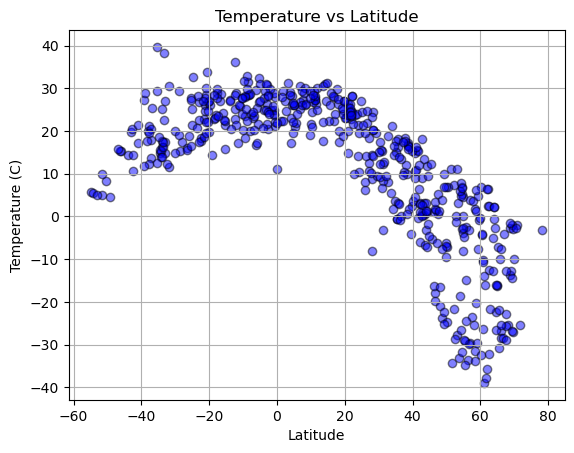

In [45]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Temperature vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### <center>  Latitude Vs. Humidity <center> 

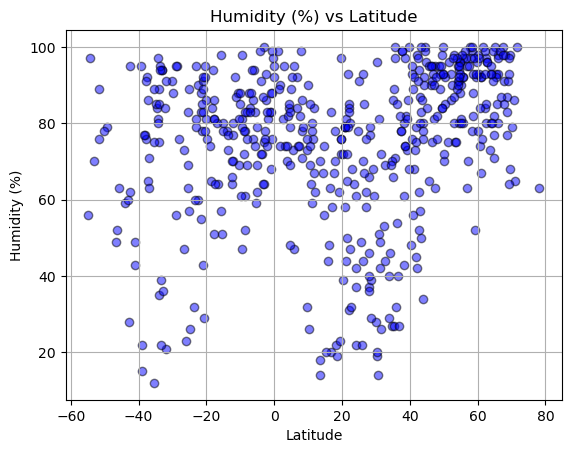

In [46]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

### <center> Latitude Vs. Cloudiness <center>

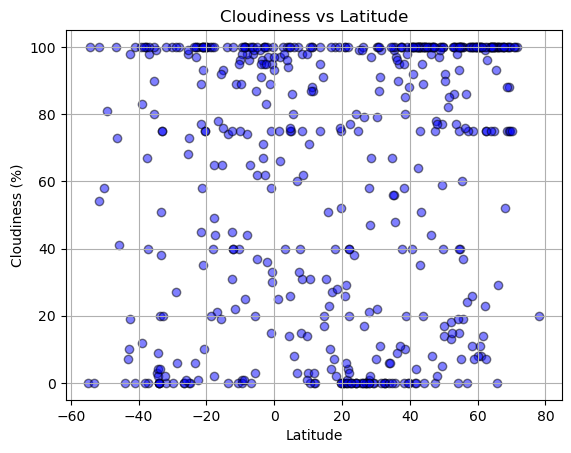

In [47]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

### <center> Latitude vs. Wind Speed Plot <center>

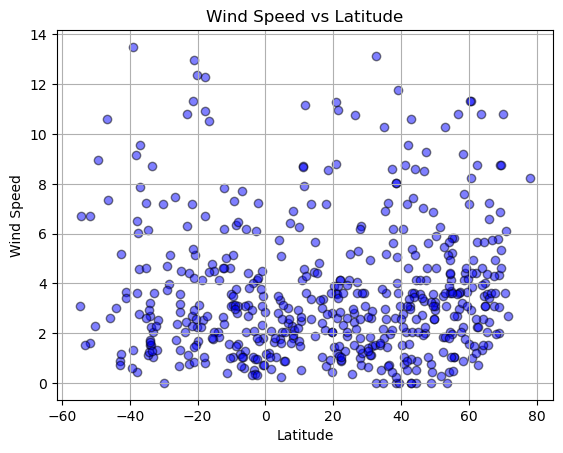

In [48]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,marker="o",facecolors="blue",edgecolors="black",alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## <center> Requirement 2: Compute Linear Regression for Each Relationship <center> 


In [34]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values , y_values , title, xlabel, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Scatter plot graph, Labels, Title, Anotate, Legend
    plt.scatter(x_values , y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.60)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, coordinates ,fontsize=12, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    print(f'Correlation Coefficient (r) is: {rvalue}')
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el matama,16.7095,33.3565,22.25,20,4,3.00,SD,1702267428
1,wailua homesteads,22.0669,-159.3780,24.44,85,40,4.12,US,1702267429
2,iskateley,67.6803,53.1512,-22.77,91,100,4.92,RU,1702267429
3,stanley,54.8680,-1.6985,4.60,96,40,4.12,GB,1702267429
5,badger,64.8000,-147.5333,-16.22,71,100,3.09,US,1702267430


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ushuaia,-54.8000,-68.3000,5.81,56,0,3.09,AR,1702267220
6,port-aux-francais,-49.3500,70.2167,4.46,79,81,8.96,TF,1702267430
8,valparaiso,-33.0393,-71.6273,14.80,94,75,2.06,CL,1702267431
9,edinburgh of the seven seas,-37.0676,-12.3116,13.64,71,98,7.88,SH,1702267431
10,mendi,-6.1761,143.6513,16.70,86,100,0.60,PG,1702267431


###  <center> Temperature vs. Latitude Linear Regression Plot <center> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: -0.821877986505082


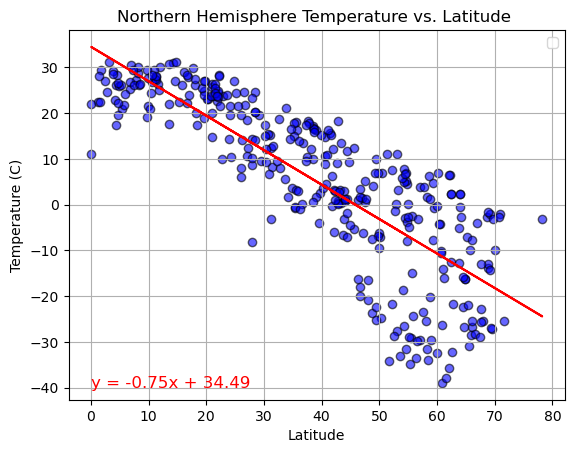

In [37]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regression_plot(x ,y, "Northern Hemisphere Temperature vs. Latitude " ,"Latitude", "Temperature (C)", (0,-40) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: 0.5888717792682518


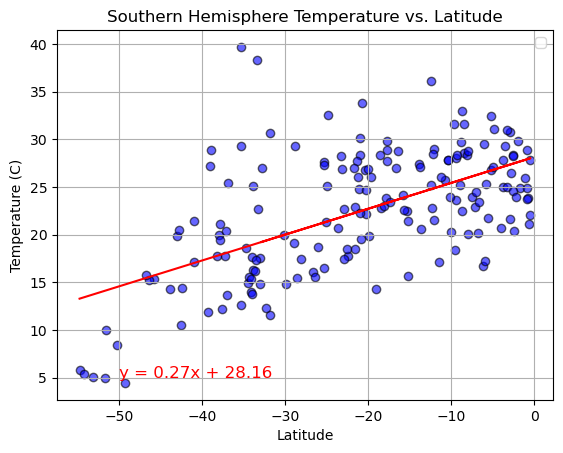

In [38]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regression_plot(x ,y, "Southern Hemisphere Temperature vs. Latitude" ,"Latitude", "Temperature (C)", (-50,5) )

**Discussion about the linear relationship:** 
The relationship beetween the 2 graphs is for the Northern hemisphere as the latitude increase the temperature decreases while the Southern hemisphere as you get closer to 0 in latitude the temperature increases.


### <center> Humidity vs. Latitude Linear Regression Plot <center> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: 0.3870680501149007


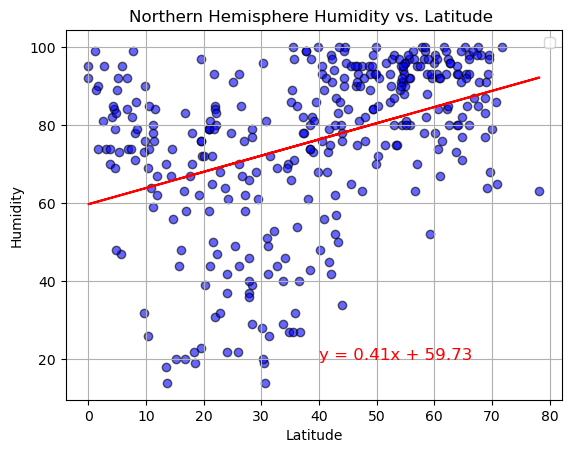

In [39]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regression_plot(x ,y, "Northern Hemisphere Humidity vs. Latitude " ,"Latitude", "Humidity", (40,20) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: 0.23278757485260365


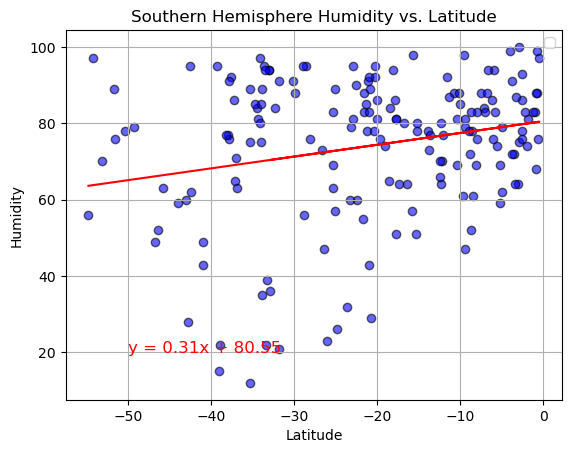

In [40]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regression_plot(x ,y, "Southern Hemisphere Humidity vs. Latitude" ,"Latitude", "Humidity", (-50,20) )

**Discussion about the linear relationship:** 
The relationship in the graphs Northern and southern hemisphere is the humidity increases as the latitude increases.

### <center>  Cloudiness vs. Latitude Linear Regression Plot <center>  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: 0.2728131453298536


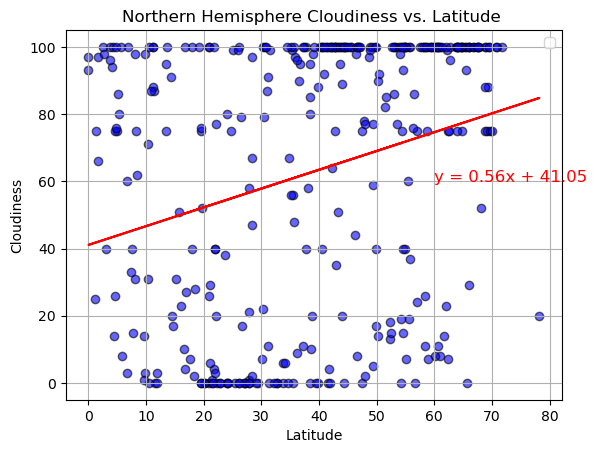

In [41]:
# Northern Hemisphere
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regression_plot(x ,y, "Northern Hemisphere Cloudiness vs. Latitude " ,"Latitude", "Cloudiness", (60,60) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: 0.22442717926652642


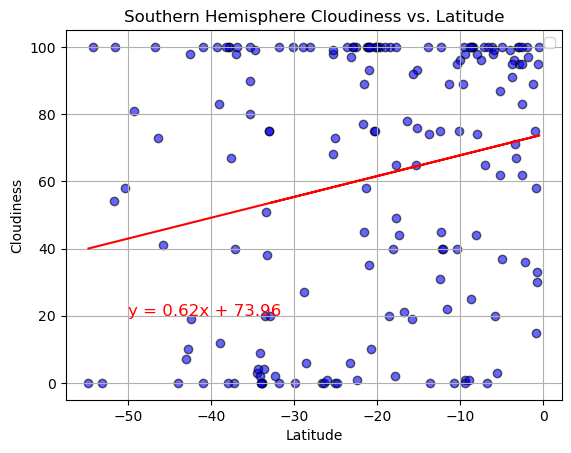

In [42]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regression_plot(x ,y, "Southern Hemisphere Cloudiness vs. Latitude" ,"Latitude", "Cloudiness", (-50,20) )

**Discussion about the linear relationship:** 
There is not major relationship between northern and southern hemispheres about cloudiness and latitude, but the latitude and the cloudiness increases faster in the northern hemisphere than the southern hemisphere.

### <center>  Wind Speed vs. Latitude Linear Regression Plot <center> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: 0.1630064805399169


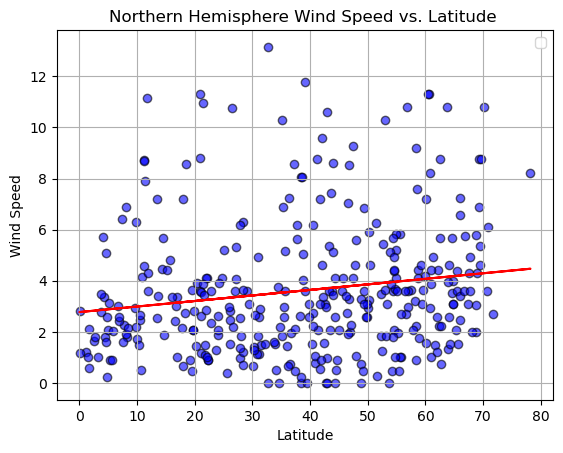

In [43]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regression_plot(x ,y, "Northern Hemisphere Wind Speed vs. Latitude " ,"Latitude", "Wind Speed", (0,17.5) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation Coefficient (r) is: -0.1564621712807557


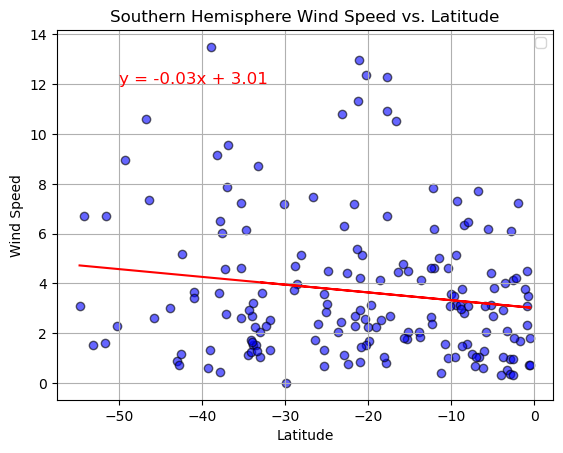

In [44]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regression_plot(x ,y, "Southern Hemisphere Wind Speed vs. Latitude" ,"Latitude", "Wind Speed", (-50,12) )

**Discussion about the linear relationship:** 
The relationship in this case between the northern and the southern is the wind speed tend to reduce speed as approach 0-equator from the southern hemisphere while in the northern hemisphere the wind speed seems to be pretty stable.